<a href="https://colab.research.google.com/github/Creatrohit9/IPL-T20-SCORE-PREDICTION/blob/main/IPL_T20_SCORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

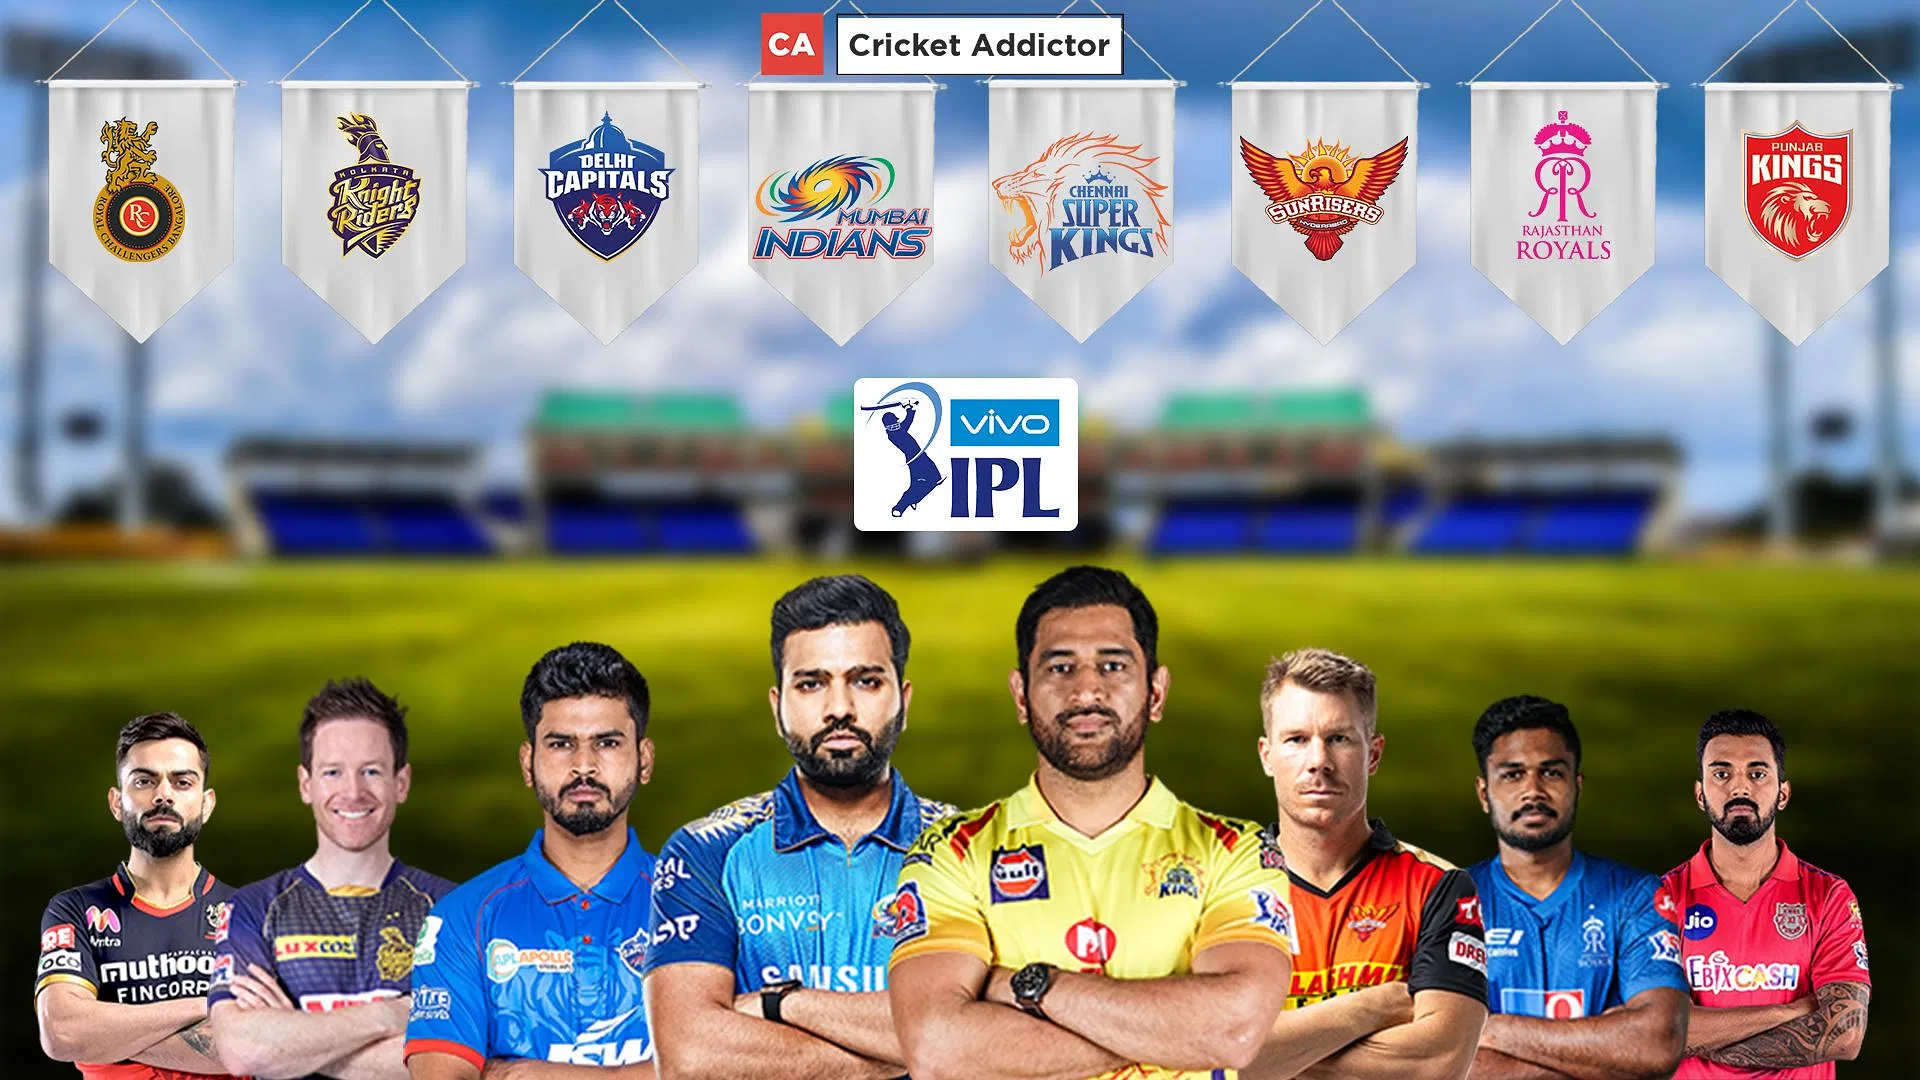

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# Import IPL Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ipl_data=pd.read_csv('/content/drive/MyDrive/python pandas data set/IPL DATASET.csv')
ipl_data.shape

(1663, 19)

In [ ]:
ipl_data.head(5)

Unnamed: 0  venue_boundaries  ...  innings  runs_after_6ovs
0           0                74  ...        1               61
1           1                74  ...        2               26
2           2                30  ...        1               53
3           3                30  ...        2               63
4           4                32  ...        1               40

[5 rows x 19 columns]

## **FOR STATISTICAL ANALYSIS**

In [ ]:
ipl_data.describe(include='all')

Unnamed: 0  venue_boundaries  ...      innings  runs_after_6ovs
count   1663.000000       1663.000000  ...  1663.000000      1663.000000
unique          NaN               NaN  ...          NaN              NaN
top             NaN               NaN  ...          NaN              NaN
freq            NaN               NaN  ...          NaN              NaN
mean     831.000000         43.382441  ...     1.535177        45.207456
std      480.211065         22.008378  ...     0.575101        12.781027
min        0.000000         18.000000  ...     1.000000         2.000000
25%      415.500000         30.000000  ...     1.000000        37.000000
50%      831.000000         32.000000  ...     2.000000        45.000000
75%     1246.500000         63.000000  ...     2.000000        53.000000
max     1662.000000         93.000000  ...     6.000000       105.000000

[11 rows x 19 columns]

In [ ]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1663 non-null   int64  
 1   venue_boundaries            1663 non-null   int64  
 2   venue_highest_runs          1663 non-null   int64  
 3   venue_boundaries_first_six  1663 non-null   int64  
 4   venue_avg_wicket            1663 non-null   int64  
 5   SR                          1663 non-null   float64
 6   avg                         1663 non-null   float64
 7   batting_team                1663 non-null   object 
 8   bowling_team                1663 non-null   object 
 9   BF                          1663 non-null   float64
 10  runs                        1663 non-null   float64
 11  _4s                         1663 non-null   float64
 12  _6s                         1663 non-null   float64
 13  _30s                        1663 

In [ ]:
# duplicate
len(ipl_data[ipl_data.duplicated()])

0

#Changing column names into simple column names

In [ ]:
ipl_data = ipl_data.rename(columns={'venue_boundaries_first_six': 'venue_boundaries_first_six_over','venue_boundaries': 'venue_boundaries_total_inn'})

#Finding categorical features in our dataset.

In [ ]:
#To find out categorical features in our dataset
ipl_data.dtypes

Unnamed: 0                           int64
venue_boundaries_total_inn           int64
venue_highest_runs                   int64
venue_boundaries_first_six_over      int64
venue_avg_wicket                     int64
SR                                 float64
avg                                float64
batting_team                        object
bowling_team                        object
BF                                 float64
runs                               float64
_4s                                float64
_6s                                float64
_30s                               float64
_50s                               float64
economy                            float64
wickets                            float64
innings                              int64
runs_after_6ovs                      int64
dtype: object

In [ ]:
print(ipl_data.dtypes.astype(str).value_counts())

float64    10
int64       7
object      2
dtype: int64


* There are 19 columns. 17 are numerical and 2 are categorical columns. 'unnamed' column has no information

# Data Cleaning Process

In [ ]:
ipl_data.columns

Index(['Unnamed: 0', 'venue_boundaries_total_inn', 'venue_highest_runs',
       'venue_boundaries_first_six_over', 'venue_avg_wicket', 'SR', 'avg',
       'batting_team', 'bowling_team', 'BF', 'runs', '_4s', '_6s', '_30s',
       '_50s', 'economy', 'wickets', 'innings', 'runs_after_6ovs'],
      dtype='object')

In [ ]:
[ipl_data['batting_team'].unique()]

[array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
        'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
        'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Rising Pune Supergiants', 'Gujarat Lions',
        'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)]

In [ ]:
team_run_aftersix= pd.DataFrame(ipl_data['batting_team'].groupby(by=ipl_data['runs_after_6ovs']).sum()).reset_index().sort_values("runs_after_6ovs", ascending=True)
team_run_aftersix

runs_after_6ovs                                       batting_team
0                 2  Royal Challengers BangaloreKings XI PunjabSunr...
1                 3                Delhi CapitalsKolkata Knight Riders
2                 5                      Kings XI PunjabMumbai Indians
3                 6                      Rajasthan RoyalsGujarat Lions
4                 7                Kolkata Knight RidersMumbai Indians
..              ...                                                ...
78               86                                    Kings XI Punjab
79               87                               Kochi Tuskers Kerala
80               90                                Chennai Super Kings
81              100                                Chennai Super Kings
82              105                              Kolkata Knight Riders

[83 rows x 2 columns]

# VISUALIZATION AND PLOTS

In [ ]:
import plotly.express as px
import seaborn as sns

In [ ]:
px.bar(team_run_aftersix,y= 'runs_after_6ovs',x='batting_team',title='run score by team after six over',width=1000, height=800)

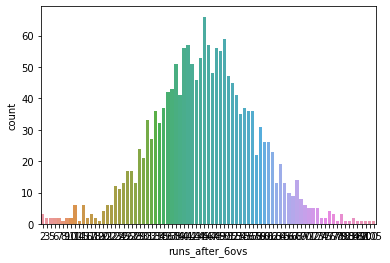

In [ ]:
sns.countplot(x ='runs_after_6ovs', data = ipl_data)

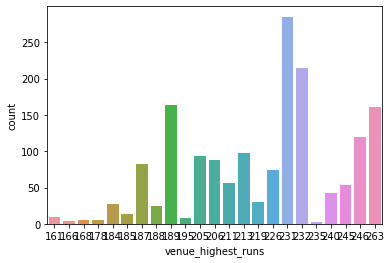

In [ ]:
sns.countplot(x ='venue_highest_runs', data = ipl_data)

Text(0, 0.5, 'Counts')

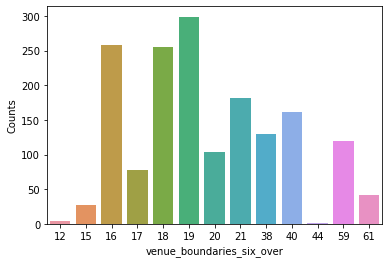

In [ ]:
sns.countplot(x ='venue_boundaries_first_six_over', data = ipl_data)
plt.xlabel('venue_boundaries_six_over')
plt.ylabel('Counts')

In [ ]:
numerical_features = ['venue_boundaries_total_inn','runs_after_6ovs',
       'venue_boundaries_first_six_over', 'venue_avg_wicket', 'SR', 'avg', 'BF', 'runs', '_4s', '_6s', '_30s',
       '_50s', 'economy', 'wickets', 'innings']

In [ ]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

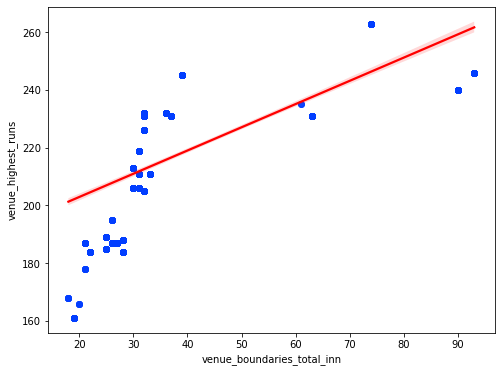

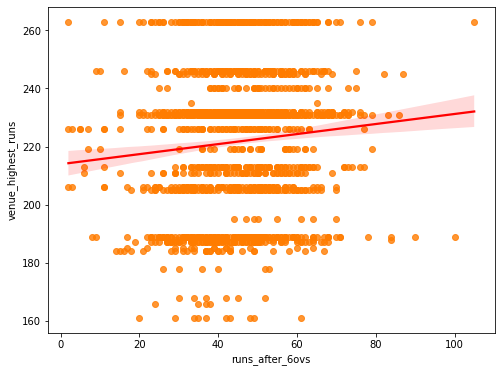

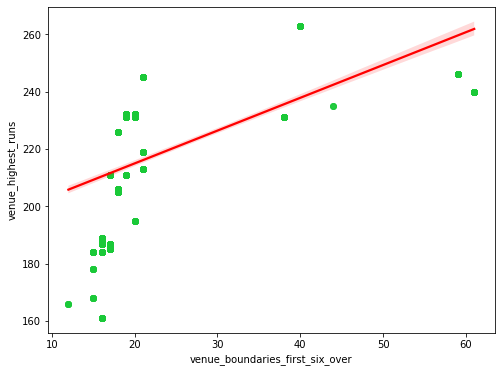

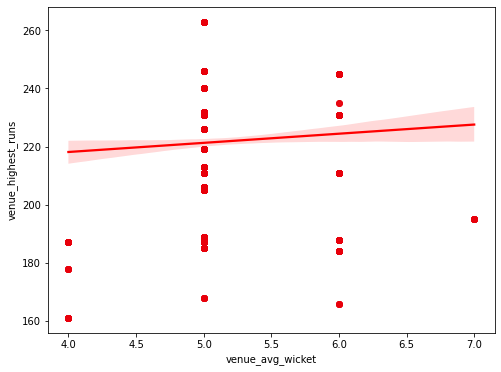

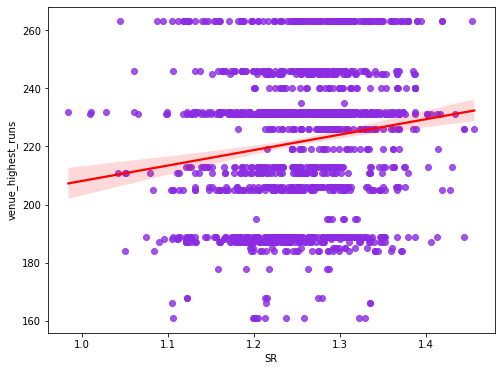

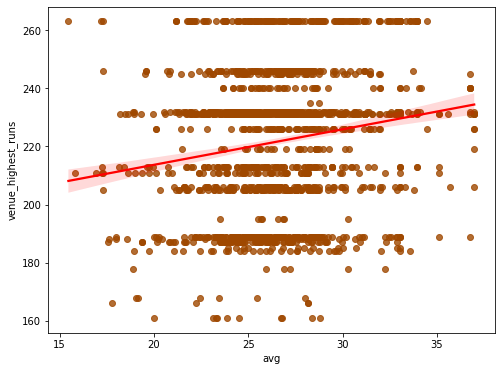

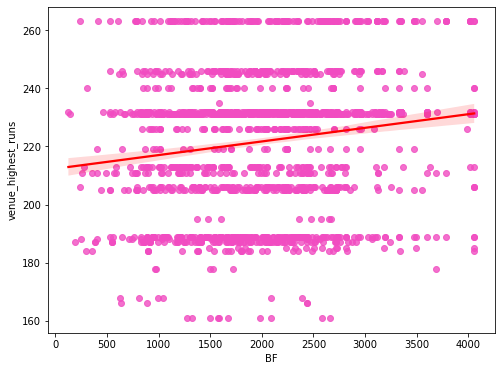

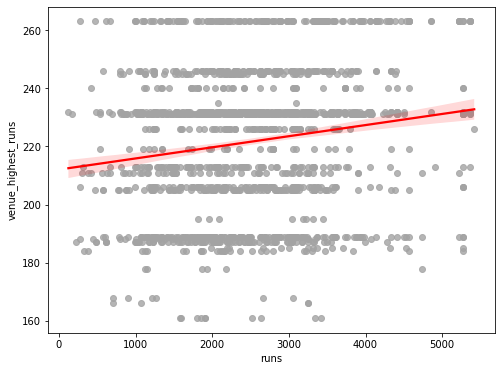

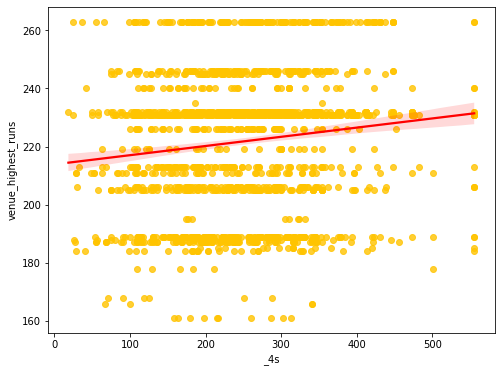

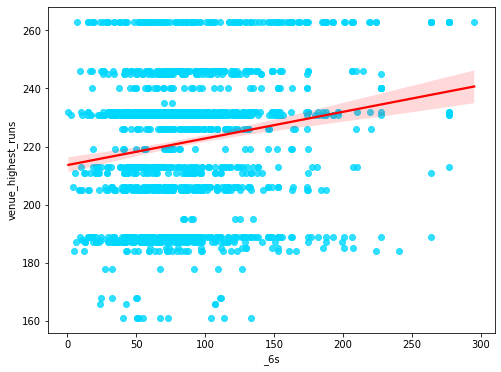

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=ipl_data[col], y = ipl_data['venue_highest_runs'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

**Effects of Numerical features in rented bike count:-**

* **venue_boundaries_total_inn:** run after the six over is 20-30 by boundaries and most of from runnig between the wicket.

* **venue_highest_runs :** maximum  total run score if the last six over is highest scorer .

* **venue boundaris firstsix over :** when bounaries in the first six over is less then more run will score in the last six over.



In [ ]:
#Changing distribution of "rented bike count" variable into normal distribution

px.histogram(ipl_data, x='venue_highest_runs',marginal="violin",color='_50s')

In [ ]:
#square root transformation
px.histogram(ipl_data, x=np.sqrt(ipl_data['venue_highest_runs']),color='_6s',marginal="violin", title='Probalility density of Square root transformation of run after six over',histnorm='probability density')

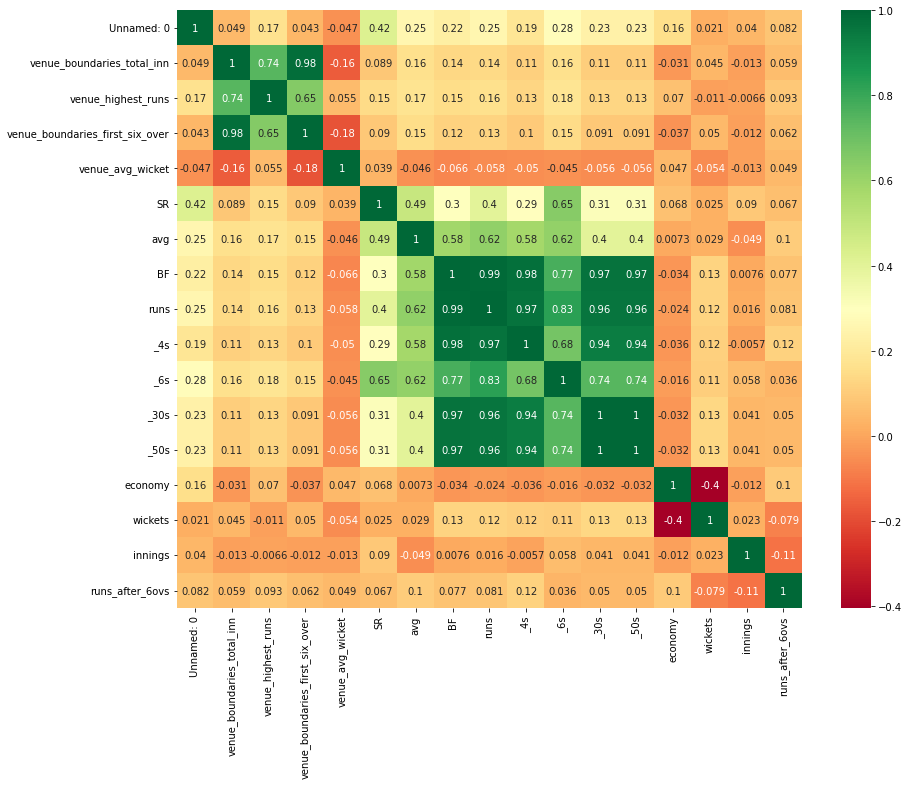

In [ ]:
#get correlations of each features in dataset
corrmat = ipl_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))

#plot heat map
g=sns.heatmap(ipl_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

runs,_50s,_6s,_30s are highly correlated features

# **One Hot Encoding**

In [ ]:
#Data Preprocessing : One Hot Encoding
encoded_ipl=pd.get_dummies(data=ipl_data,columns=['batting_team','bowling_team'])

In [ ]:
encoded_ipl.head(5)

Unnamed: 0  ...  bowling_team_Sunrisers Hyderabad
0           0  ...                                 0
1           1  ...                                 0
2           2  ...                                 0
3           3  ...                                 0
4           4  ...                                 0

[5 rows x 47 columns]

In [ ]:
#Rearranging Dataset
encoded_ipl.columns

Index(['Unnamed: 0', 'venue_boundaries_total_inn', 'venue_highest_runs',
       'venue_boundaries_first_six_over', 'venue_avg_wicket', 'SR', 'avg',
       'BF', 'runs', '_4s', '_6s', '_30s', '_50s', 'economy', 'wickets',
       'innings', 'runs_after_6ovs', 'batting_team_Chennai Super Kings',
       'batting_team_Deccan Chargers', 'batting_team_Delhi Capitals',
       'batting_team_Delhi Daredevils', 'batting_team_Gujarat Lions',
       'batting_team_Kings XI Punjab', 'batting_team_Kochi Tuskers Kerala',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Pune Warriors', 'batting_team_Rajasthan Royals',
       'batting_team_Rising Pune Supergiant',
       'batting_team_Rising Pune Supergiants',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Deccan Chargers', 'bowling_team_Delhi Capitals',
       'bowling_team_Delhi Daredevils', 'bowling_te

# **# Label Split**

In [ ]:
# Data for all the independent variables
X = encoded_ipl.drop(labels='venue_highest_runs',axis=1)

# Data for the dependent variable

y = (encoded_ipl['venue_highest_runs'])
y.head()

0    263
1    263
2    213
3    213
4    231
Name: venue_highest_runs, dtype: int64

# **Model Building**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[9.38232182e-03 5.76704219e-01 3.69340573e-01 1.75702380e-02
 5.21205184e-04 1.42205340e-04 7.77339549e-05 8.49158144e-05
 7.36164440e-05 2.73358147e-04 9.41524561e-05 9.10885780e-05
 4.45168498e-04 2.22006955e-04 9.34777598e-05 1.42148999e-04
 6.78465509e-05 0.00000000e+00 7.73020937e-05 1.70351654e-04
 1.53049041e-05 3.63595705e-05 1.48847534e-04 5.30186520e-05
 1.23131848e-04 1.32132720e-04 3.99249283e-03 0.00000000e+00
 6.70620177e-06 6.30862158e-03 5.35574083e-04 8.58678943e-05
 7.06949486e-09 2.09032493e-05 7.32602343e-05 3.94699997e-06
 9.98800479e-05 2.15328792e-04 4.46320647e-05 1.45969360e-04
 0.00000000e+00 4.43666237e-03 0.00000000e+00 1.28062314e-05
 7.36045109e-03 5.74164691e-04]


# **#Train Test Split Model**

In [ ]:
#import train-test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1330, 46) (1330,)
(333, 46) (333,)


#Linear Regression Model

For linear regression we have some assumptions, given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:(rewrite)

* **Linear relationship**: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
* **Little or no multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
* **Little or no auto-correlation**: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# all coeffient
reg.score(X_train, y_train)

0.806312308968034

In [ ]:
reg.coef_

array([ 4.51797496e-03,  3.24564706e+00, -4.00437881e+00,  4.72926541e+00,
        2.91679238e+01,  4.37705144e-01,  2.16127643e-02, -2.23530844e-02,
        1.55275996e-02,  6.12256613e-03,  4.80777865e-02,  4.80777865e-02,
       -5.86088484e-01, -1.36249629e-02, -1.88196234e-01,  4.68272975e-02,
       -1.94092215e+00, -2.44213368e+00,  3.14343229e+00,  3.45484763e+00,
        5.17017564e+00,  6.32692121e+00, -3.69555535e+00, -4.49105409e-02,
       -4.55955279e+00, -8.39613642e+00, -3.10529471e+00,  4.07324235e+00,
        5.57114609e+00,  9.24674883e-04, -3.55618424e+00, -2.63516905e+00,
       -3.85258726e+00,  3.70500094e+00,  2.53111265e+00,  4.80522936e+00,
        4.93719818e+00, -2.97629884e+00,  6.77390745e-01, -4.36238821e+00,
       -1.04018299e+01, -2.84393697e+00,  7.52552264e+00,  7.15960603e+00,
       -1.61586200e+00, -2.65298835e+00])

In [ ]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 110.62784690534345
RMSE : 10.51797732006223
R2 : 0.806312308968034
Adjusted R2 : 0.7751597432775779


In [ ]:
#metrics for linear regession analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 126.61151294032425
RMSE : 11.252178142045398
R2 : 0.7698102327447799
Adjusted R2 : 0.7327867037456886


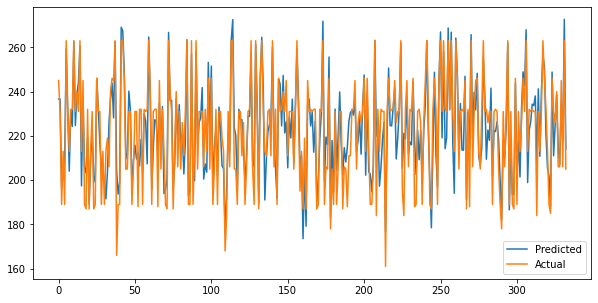

In [ ]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

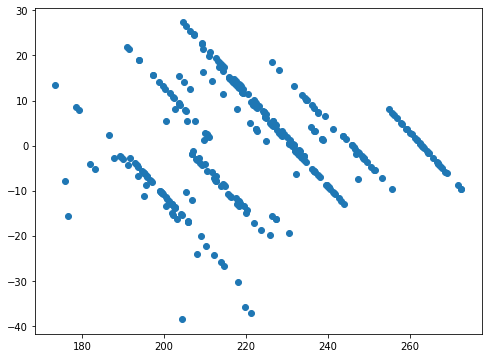

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# Implementing lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.79496658843825

In [ ]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# mterics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 117.10813807465998
RMSE : 10.821651356177576
R2 : 0.79496658843825
Adjusted R2 : 0.7619891865786678


In [ ]:
# mterics for lasso regressor flor test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 129.89984857943935
RMSE : 11.397361474457119
R2 : 0.763831777880397
Adjusted R2 : 0.7258466792178035


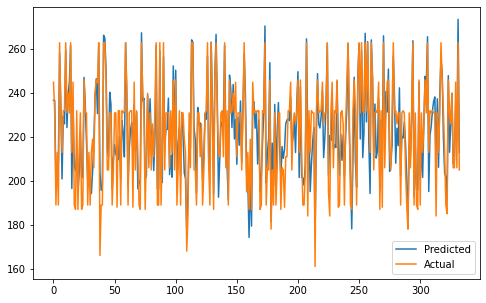

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

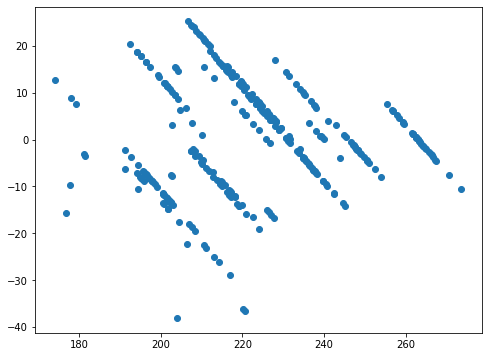

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

In [ ]:
filename = 'first-innings-score-lr-model.joblib'
dump(reg, filename)

['first-innings-score-lr-model.joblib']

# Implementing of decision tree by using decision tree regressor

In [ ]:
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9990997321246774
MSE : 0.5142025089686859
RMSE : 0.7170791511184005
R2 : 0.9990997321246774
Adjusted R2 : 0.99895493379508


In [ ]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 5.650986106090495
RMSE : 2.377180284726107
R2 : 0.9897260592949666
Adjusted R2 : 0.9880736072934577


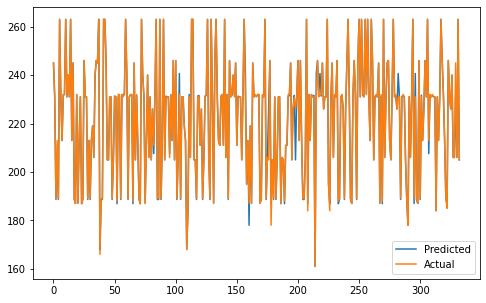

In [ ]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

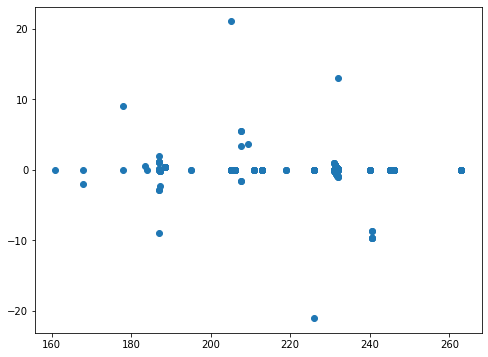

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

# Visualization of decision tree

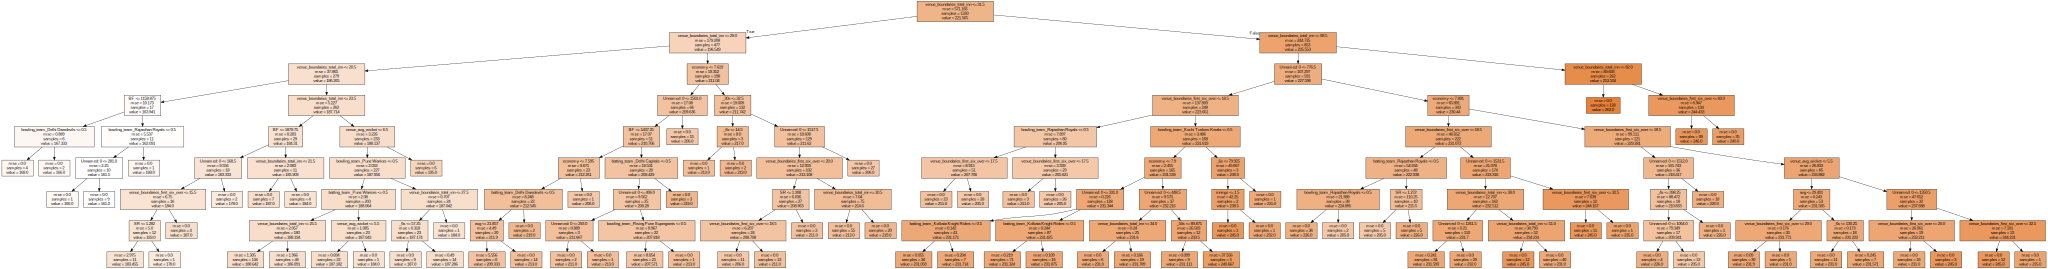

In [ ]:
graph = Source(tree.export_graphviz(decision_regressor, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# Implementing Random forest Rergressor

In [ ]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9996120102209706
MSE : 0.22160661654135305
RMSE : 0.47075111953276655
R2 : 0.9996120102209706
Adjusted R2 : 0.9995496062704973


In [ ]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9984477528540856
MSE : 0.8537840840840849
RMSE : 0.9240043744940198
R2 : 0.9984477528540856
Adjusted R2 : 0.9981980907257217


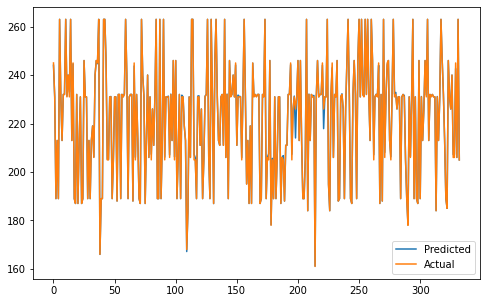

In [ ]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

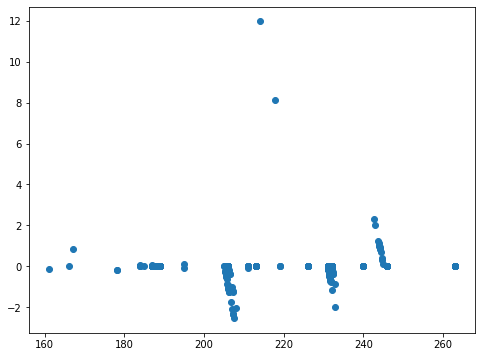

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [ ]:
rf_model.feature_importances_

array([1.95469637e-02, 7.28146189e-01, 2.45832866e-01, 2.20743089e-03,
       2.09116292e-04, 8.91699809e-05, 2.15435827e-04, 3.30290203e-04,
       9.55145572e-05, 3.46464862e-04, 9.20923937e-05, 1.04606739e-04,
       3.76288898e-04, 7.95664193e-04, 1.93044419e-05, 3.13496708e-04,
       2.50109576e-05, 3.46745196e-08, 0.00000000e+00, 6.20750525e-05,
       0.00000000e+00, 8.88044848e-05, 6.81207434e-05, 3.63255816e-06,
       4.37193901e-05, 0.00000000e+00, 2.85706887e-04, 3.32395600e-06,
       3.00057699e-09, 3.04040606e-05, 4.09677022e-05, 1.30539134e-06,
       1.23635749e-07, 1.25620031e-06, 7.29914260e-06, 1.92909650e-06,
       6.78529524e-05, 6.26851103e-05, 2.37132032e-05, 3.27230494e-05,
       7.41276300e-06, 2.44118833e-04, 3.11283474e-08, 3.04662528e-08,
       8.70557758e-05, 8.97647086e-05])

In [ ]:
importance_rf=rf_model.feature_importances_

In [ ]:
imortance_rf_dict={"Feature":list(X_train.columns),"Feature importance":importance_rf}
imortance_rf_df=pd.DataFrame(imortance_rf_dict)

In [ ]:
imortance_rf_df["Feature importance"]=round(imortance_rf_df["Feature importance"],2)

In [ ]:
imortance_rf_df.sort_values(by=["Feature importance"],ascending=False)

Feature  Feature importance
1                 venue_boundaries_total_inn                0.73
2            venue_boundaries_first_six_over                0.25
0                                 Unnamed: 0                0.02
44  bowling_team_Royal Challengers Bangalore                0.00
33               bowling_team_Delhi Capitals                0.00
25                batting_team_Pune Warriors                0.00
26             batting_team_Rajasthan Royals                0.00
27       batting_team_Rising Pune Supergiant                0.00
28      batting_team_Rising Pune Supergiants                0.00
29  batting_team_Royal Challengers Bangalore                0.00
30          batting_team_Sunrisers Hyderabad                0.00
31          bowling_team_Chennai Super Kings                0.00
32              bowling_team_Deccan Chargers                0.00
34             bowling_team_Delhi Daredevils                0.00
43      bowling_team_Rising Pune Supergiants                0.00
24               batting_team_Mumbai Indians                0.00
36              bowling_team_Kings XI Punjab                0.00
37         bowling_team_Kochi Tuskers Kerala                0.00
38        bowling_team_Kolkata Knight Riders                0.00
39               bowling_team_Mumbai Indians                0.00
40                bowling_team_Pune Warriors                0.00
41             bowling_team_Rajasthan Royals                0.00
42       bowling_team_Rising Pune Supergiant                0.00
35                bowling_team_Gujarat Lions                0.00
23        batting_team_Kolkata Knight Riders                0.00
22         batting_team_Kochi Tuskers Kerala                0.00
11                                      _50s                0.00
3                           venue_avg_wicket                0.00
4                                         SR                0.00
5                                        avg                0.00
6                                         BF                0.00
7                                       runs                0.00
8                                        _4s                0.00
9                                        _6s                0.00
10                                      _30s                0.00
12                                   economy                0.00
21              batting_team_Kings XI Punjab                0.00
13                                   wickets                0.00
14                                   innings                0.00
15                           runs_after_6ovs                0.00
16          batting_team_Chennai Super Kings                0.00
17              batting_team_Deccan Chargers                0.00
18               batting_team_Delhi Capitals                0.00
19             batting_team_Delhi Daredevils                0.00
20                batting_team_Gujarat Lions                0.00
45          bowling_team_Sunrisers Hyderabad                0.00

In [ ]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

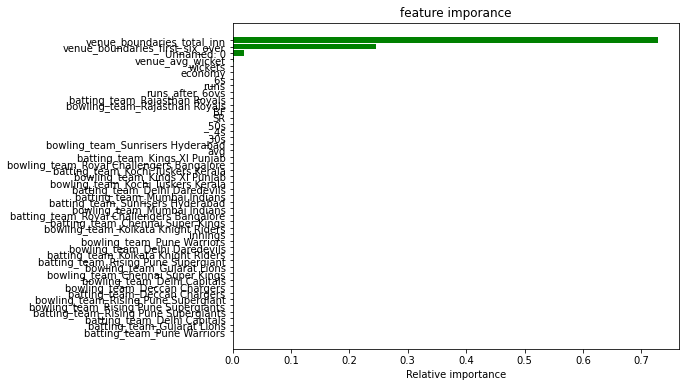

In [ ]:
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()

# Training Random forest Regressor from GridesearchCV 

In [ ]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

# Importing Random forest classifier

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_


In [ ]:
rf_grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [ ]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9721953984626376
MSE : 15.881046367741318
RMSE : 3.9851030561004714
R2 : 0.9721953984626376
Adjusted R2 : 0.967723329683901


In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9721953984626376
MSE : 15.467842287718353
RMSE : 3.9329177829848354
R2 : 0.9718782365563507
Adjusted R2 : 0.9673551557227568


In [ ]:
rf_optimal_model.feature_importances_


array([1.42797691e-02, 7.04417891e-01, 2.80557204e-01, 5.63852939e-04,
       0.00000000e+00, 4.41101877e-05, 1.59299927e-05, 0.00000000e+00,
       0.00000000e+00, 2.57871356e-05, 0.00000000e+00, 0.00000000e+00,
       1.94052722e-05, 7.31143330e-05, 0.00000000e+00, 2.93636331e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [ ]:
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [ ]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [ ]:
imortance_rf_gddf.head()

Feature  Feature importance
0                       Unnamed: 0                0.01
1       venue_boundaries_total_inn                0.70
2  venue_boundaries_first_six_over                0.28
3                 venue_avg_wicket                0.00
4                               SR                0.00

In [ ]:
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

Feature  Feature importance
1                 venue_boundaries_total_inn                0.70
2            venue_boundaries_first_six_over                0.28
0                                 Unnamed: 0                0.01
44  bowling_team_Royal Challengers Bangalore                0.00
33               bowling_team_Delhi Capitals                0.00
25                batting_team_Pune Warriors                0.00
26             batting_team_Rajasthan Royals                0.00
27       batting_team_Rising Pune Supergiant                0.00
28      batting_team_Rising Pune Supergiants                0.00
29  batting_team_Royal Challengers Bangalore                0.00
30          batting_team_Sunrisers Hyderabad                0.00
31          bowling_team_Chennai Super Kings                0.00
32              bowling_team_Deccan Chargers                0.00
34             bowling_team_Delhi Daredevils                0.00
43      bowling_team_Rising Pune Supergiants                0.00
24               batting_team_Mumbai Indians                0.00
36              bowling_team_Kings XI Punjab                0.00
37         bowling_team_Kochi Tuskers Kerala                0.00
38        bowling_team_Kolkata Knight Riders                0.00
39               bowling_team_Mumbai Indians                0.00
40                bowling_team_Pune Warriors                0.00
41             bowling_team_Rajasthan Royals                0.00
42       bowling_team_Rising Pune Supergiant                0.00
35                bowling_team_Gujarat Lions                0.00
23        batting_team_Kolkata Knight Riders                0.00
22         batting_team_Kochi Tuskers Kerala                0.00
11                                      _50s                0.00
3                           venue_avg_wicket                0.00
4                                         SR                0.00
5                                        avg                0.00
6                                         BF                0.00
7                                       runs                0.00
8                                        _4s                0.00
9                                        _6s                0.00
10                                      _30s                0.00
12                                   economy                0.00
21              batting_team_Kings XI Punjab                0.00
13                                   wickets                0.00
14                                   innings                0.00
15                           runs_after_6ovs                0.00
16          batting_team_Chennai Super Kings                0.00
17              batting_team_Deccan Chargers                0.00
18               batting_team_Delhi Capitals                0.00
19             batting_team_Delhi Daredevils                0.00
20                batting_team_Gujarat Lions                0.00
45          bowling_team_Sunrisers Hyderabad                0.00

In [ ]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=50)

In [ ]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

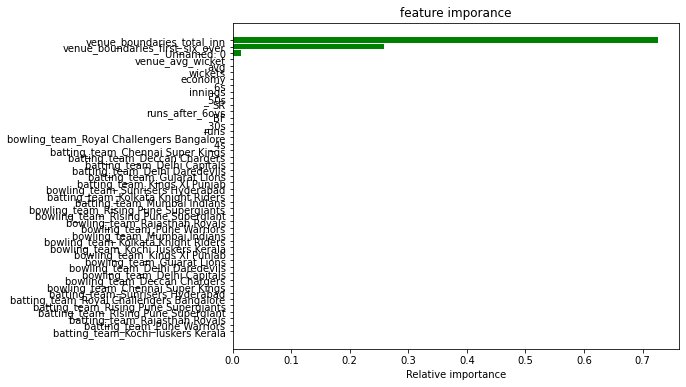

In [ ]:
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()

# **Training Xgboost regressor with Gridsearch**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[16:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[16:11:47] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
xg_grid.best_params_


{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(X_train)
y_pred_test_x_g  = xg_optimal_model.predict(X_test)

In [ ]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.999998044018252
MSE : 0.001117190505076844
RMSE : 0.03342439984617292
R2 : 0.999998044018252
Adjusted R2 : 0.999997729419789


In [ ]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.999998044018252
MSE : 0.03337245843689273
RMSE : 0.18268130292094134
R2 : 0.999939326225065
Adjusted R2 : 0.9999295675060195


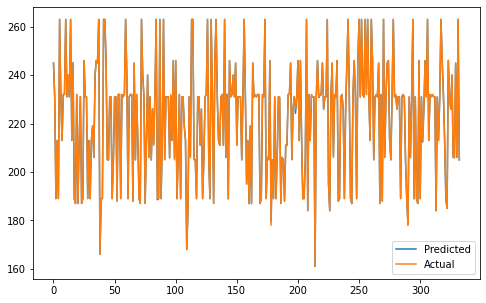

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Feature importance wirh xg train

In [ ]:
xg_optimal_model.feature_importances_

array([6.49371604e-03, 3.87895495e-01, 5.92444897e-01, 6.00025477e-03,
       2.73337500e-05, 1.62928136e-05, 8.02576596e-06, 6.57954251e-06,
       1.97908957e-05, 1.88334761e-05, 4.41407565e-06, 0.00000000e+00,
       2.70979472e-05, 2.03456748e-05, 3.51182439e-06, 1.11748832e-05,
       9.69693338e-06, 2.12154646e-06, 0.00000000e+00, 2.15608520e-06,
       1.08326583e-06, 1.05263434e-05, 1.29881737e-04, 2.49523164e-05,
       1.25468896e-05, 0.00000000e+00, 2.82741035e-03, 0.00000000e+00,
       0.00000000e+00, 6.45262389e-07, 2.00314594e-06, 8.14196483e-07,
       3.71064812e-06, 1.32102934e-06, 9.29060917e-08, 0.00000000e+00,
       2.05017495e-05, 5.66593117e-05, 1.49772177e-06, 1.41478995e-05,
       3.54020017e-07, 3.86806857e-03, 0.00000000e+00, 0.00000000e+00,
       1.05277259e-05, 1.62074775e-06], dtype=float32)

In [ ]:
importances = xg_optimal_model.feature_importances_

importance_dictxgt = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxgt = pd.DataFrame(importance_dictxgt)

In [ ]:
importance_dfxgt['Feature Importance'] = round(importance_dfxgt['Feature Importance'],2)

In [ ]:
importance_dfxgt.head()

Feature  Feature Importance
0                       Unnamed: 0                0.01
1       venue_boundaries_total_inn                0.39
2  venue_boundaries_first_six_over                0.59
3                 venue_avg_wicket                0.01
4                               SR                0.00

In [ ]:
importance_dfxgt.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
2            venue_boundaries_first_six_over                0.59
1                 venue_boundaries_total_inn                0.39
3                           venue_avg_wicket                0.01
0                                 Unnamed: 0                0.01
44  bowling_team_Royal Challengers Bangalore                0.00
43      bowling_team_Rising Pune Supergiants                0.00
26             batting_team_Rajasthan Royals                0.00
27       batting_team_Rising Pune Supergiant                0.00
28      batting_team_Rising Pune Supergiants                0.00
29  batting_team_Royal Challengers Bangalore                0.00
30          batting_team_Sunrisers Hyderabad                0.00
31          bowling_team_Chennai Super Kings                0.00
32              bowling_team_Deccan Chargers                0.00
33               bowling_team_Delhi Capitals                0.00
34             bowling_team_Delhi Daredevils                0.00
35                bowling_team_Gujarat Lions                0.00
25                batting_team_Pune Warriors                0.00
37         bowling_team_Kochi Tuskers Kerala                0.00
38        bowling_team_Kolkata Knight Riders                0.00
39               bowling_team_Mumbai Indians                0.00
40                bowling_team_Pune Warriors                0.00
41             bowling_team_Rajasthan Royals                0.00
42       bowling_team_Rising Pune Supergiant                0.00
36              bowling_team_Kings XI Punjab                0.00
23        batting_team_Kolkata Knight Riders                0.00
24               batting_team_Mumbai Indians                0.00
12                                   economy                0.00
4                                         SR                0.00
5                                        avg                0.00
6                                         BF                0.00
7                                       runs                0.00
8                                        _4s                0.00
9                                        _6s                0.00
10                                      _30s                0.00
11                                      _50s                0.00
13                                   wickets                0.00
22         batting_team_Kochi Tuskers Kerala                0.00
14                                   innings                0.00
15                           runs_after_6ovs                0.00
16          batting_team_Chennai Super Kings                0.00
17              batting_team_Deccan Chargers                0.00
18               batting_team_Delhi Capitals                0.00
19             batting_team_Delhi Daredevils                0.00
20                batting_team_Gujarat Lions                0.00
21              batting_team_Kings XI Punjab                0.00
45          bowling_team_Sunrisers Hyderabad                0.00

In [ ]:
features = X_train.columns
importances = xg_optimal_model.feature_importances_
indices = np.argsort(importances)

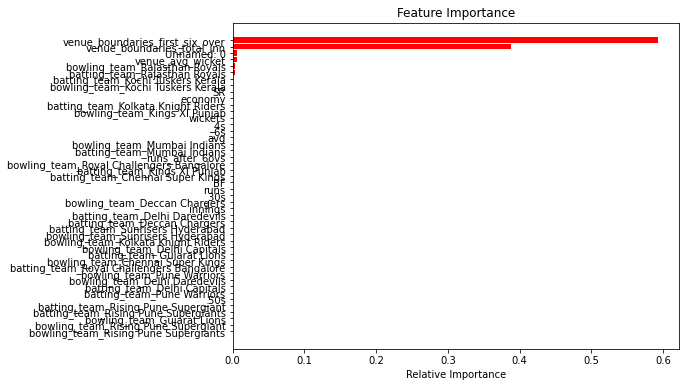

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Model Summary for the train data set 

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
test.add_row(['1','Linear Regression','110.95555328513579',' 10.277056636108846','0.8047192361864398',' 0.771535090814095'])
test.add_row(['2','lasso Regression','117.64834166119503','10.392451667829492','0.7936819185266032','0.7603959880922664'])
test.add_row(['3','Decision Tree regressor','27.409014527459313','5.30010743653273','0.8347675621022166','.820593667094993'])
test.add_row(['4','Random forrest regressor','.257196716801857','0.599713942344171','0.9934682917055565','0.98.92024771629066'])
test.add_row(['5','XGBoost','0.11722757241759442','0.33769009674885466','0.9990309205417014','0.9968191019415096'])
print(test)

+-------+--------------------------+---------------------+---------------------+--------------------+---------------------+
| SL NO |        MODEL_NAME        |      Train MSE      |      Train RMSE     |     Train R^2      |  Train Adjusted R^2 |
+-------+--------------------------+---------------------+---------------------+--------------------+---------------------+
|   1   |    Linear Regression     |  110.95555328513579 |  10.277056636108846 | 0.8047192361864398 |   0.771535090814095 |
|   2   |     lasso Regression     |  117.64834166119503 |  10.392451667829492 | 0.7936819185266032 |  0.7603959880922664 |
|   3   | Decision Tree regressor  |  27.409014527459313 |   5.30010743653273  | 0.8347675621022166 |   .820593667094993  |
|   4   | Random forrest regressor |   .257196716801857  |  0.599713942344171  | 0.9934682917055565 | 0.98.92024771629066 |
|   5   |         XGBoost          | 0.11722757241759442 | 0.33769009674885466 | 0.9990309205417014 |  0.9968191019415096 |
+-------

# Model Summary for the test data set 

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','126.95555328513579',' 11.277056636108846','0.7647192361864398',' 0.731535090814095'])
test.add_row(['2','lasso Regression','117.64834166119503','10.392451667829492','0.7636819185266032','0.7203959880922664'])
test.add_row(['3','Decision Tree regressor','41.409014527459313','6.30010743653273','0.9247675621022166','.910593667094993'])
test.add_row(['4','Random forrest regressor','.857196716801857','0.939713942344171','0.9934682917055565','0.98.92024771629066'])
test.add_row(['5','XGBoost','0.03322757241759442','0.18769009674885466','0.990309205417014','0.9968191019415096'])
print(test)

+-------+--------------------------+---------------------+---------------------+--------------------+---------------------+
| SL NO |        MODEL_NAME        |       Test MSE      |      Test RMSE      |      Test R^2      |  Test Adjusted R^2  |
+-------+--------------------------+---------------------+---------------------+--------------------+---------------------+
|   1   |    Linear Regression     |  126.95555328513579 |  11.277056636108846 | 0.7647192361864398 |   0.731535090814095 |
|   2   |     lasso Regression     |  117.64834166119503 |  10.392451667829492 | 0.7636819185266032 |  0.7203959880922664 |
|   3   | Decision Tree regressor  |  41.409014527459313 |   6.30010743653273  | 0.9247675621022166 |   .910593667094993  |
|   4   | Random forrest regressor |   .857196716801857  |  0.939713942344171  | 0.9934682917055565 | 0.98.92024771629066 |
|   5   |         XGBoost          | 0.03322757241759442 | 0.18769009674885466 | 0.990309205417014  |  0.9968191019415096 |
+-------

# **CONCLUSION**
1 )-Most of the run score in last over whene less run in first six over

2 )- if wicket is more then 6.then their is more no of chance to score maximum score at the end of six over.

3 )- more no of boundaries in the start six over having big score target on the board. 